<a href="https://colab.research.google.com/github/pabhijeet99/DS_Python_files/blob/main/Clustering_crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 1 - Business Problem
___Perform Clustering for the crime data and identify the number of clusters formed and draw inferences___

# 2 - Data collection and description

In [3]:
crimedata=pd.read_csv("/content/crime_data.csv")

In [4]:
crimedata.columns = ['City','Murder','Assault','Urbanpop','Rape']

In [6]:
crimedata.loc[:,'Total'] = crimedata.sum(numeric_only=True, axis=1)

# HIERARCHICAL CLUSTERING

In [12]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [13]:
crimedata.head()

,City,Murder,Assault,Urbanpop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6


In [14]:
#Define function to normalize numerical data
def normalize(data):
  x=(data-data.min())/(data.max()-data.min())
  return x

In [11]:
#Apply nornalization function on data frame
norm_crimedata=normalize(crimedata.iloc[:,1:])

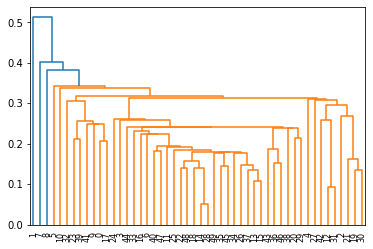

In [17]:
#Create dendogram using single linkage
Dendrogram=sch.dendrogram(sch.linkage(norm_crimedata,method='single'))

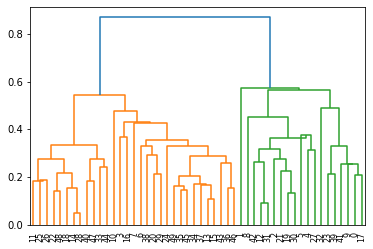

In [18]:
#Create dendogram using centroid linkage
Dendrogram=sch.dendrogram(sch.linkage(norm_crimedata,method='centroid'))

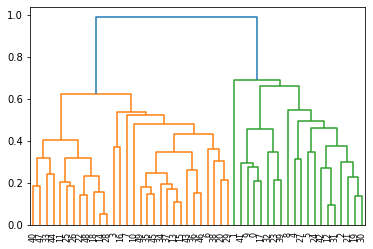

In [19]:
#Create dendogram using average linkage
Dendrogram=sch.dendrogram(sch.linkage(norm_crimedata,method='average'))

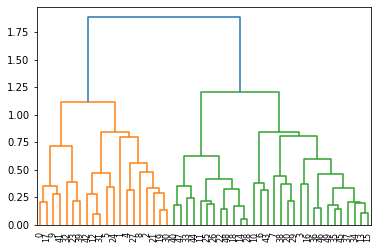

In [20]:
#Create dendogram using complete linkage
Dendrogram=sch.dendrogram(sch.linkage(norm_crimedata,method='complete'))

Here in complete linkage method it is more or less equal represantation.

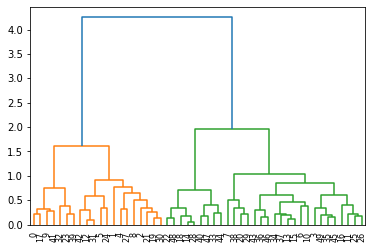

In [21]:
#Create dendogram using ward linkage
Dendrogram=sch.dendrogram(sch.linkage(norm_crimedata,method='ward'))

Here in ward method the representation is as same as complete linkage method.

In [22]:
#Creating class instance
h_clusters=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')

In [28]:
#Predicting clusters id for each record
hcs=h_clusters.fit_predict(norm_crimedata)
h_clust_id=pd.DataFrame(hcs,columns=['h_clust_id'])
h_clust_id.head()

,h_clust_id
0,3
1,1
2,1
3,0
4,1


In [29]:
# creating clusterid column in dataframe
mcrime_data=crimedata.copy(deep=True)
mcrime_data=pd.concat([h_clust_id,mcrime_data],axis=1)
mcrime_data

,h_clust_id,City,Murder,Assault,Urbanpop,Rape,Total
0,3,Alabama,13.2,236,58,21.2,328.4
1,1,Alaska,10.0,263,48,44.5,365.5
2,1,Arizona,8.1,294,80,31.0,413.1
3,0,Arkansas,8.8,190,50,19.5,268.3
4,1,California,9.0,276,91,40.6,416.6
5,1,Colorado,7.9,204,78,38.7,328.6
6,0,Connecticut,3.3,110,77,11.1,201.4
7,0,Delaware,5.9,238,72,15.8,331.7
8,1,Florida,15.4,335,80,31.9,462.3
9,3,Georgia,17.4,211,60,25.8,314.2


In [31]:
#Group and Sort on clusters
mcrime_data.groupby(mcrime_data['h_clust_id']).mean().sort_values(by='Murder')

,Murder,Assault,Urbanpop,Rape,Total
h_clust_id,,,,,
2,3.091667,76.000000,52.083333,11.833333,143.008333
0,6.055556,140.055556,71.333333,18.683333,236.127778
1,10.815385,257.384615,76.000000,33.192308,377.392308
3,14.671429,251.285714,54.285714,21.685714,341.928571


In [33]:
#Group and Sort on clusters
mcrime_data.groupby(mcrime_data['h_clust_id']).median().sort_values(by='Murder')

,Murder,Assault,Urbanpop,Rape,Total
h_clust_id,,,,,
2,2.60,76.5,53.5,11.25,139.45
0,6.15,147.0,72.0,19.15,244.50
1,11.10,255.0,80.0,31.90,377.20
3,14.40,249.0,58.0,22.20,336.20


# Inference:

Cluster 2 has the lowest crime rate among all the clusters, also this is the lowest urban population.

Crime rate has direct relationship with urbanPopulation. However cluster 0 has highest crime rate in all categories despite having the low urban population

All types of Crimes show a positive correlation

# CLUSTERING USING Kmeans

In [73]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns
# Standerdization - import standardScaler from sklern
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_data = scaler.fit_transform(crimedata.iloc[:,1:])

In [35]:
crimedata.head(3)

,City,Murder,Assault,Urbanpop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1


In [8]:
crimedata.describe()

,Murder,Assault,Urbanpop,Rape,Total
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,265.320000
std,4.35551,83.337661,14.474763,9.366385,98.350844
min,0.80000,45.000000,32.000000,7.300000,93.400000
25%,4.07500,109.000000,54.500000,15.075000,187.950000
50%,7.25000,159.000000,66.000000,20.100000,257.450000
75%,11.25000,249.000000,77.750000,26.175000,348.500000
max,17.40000,337.000000,91.000000,46.000000,462.300000


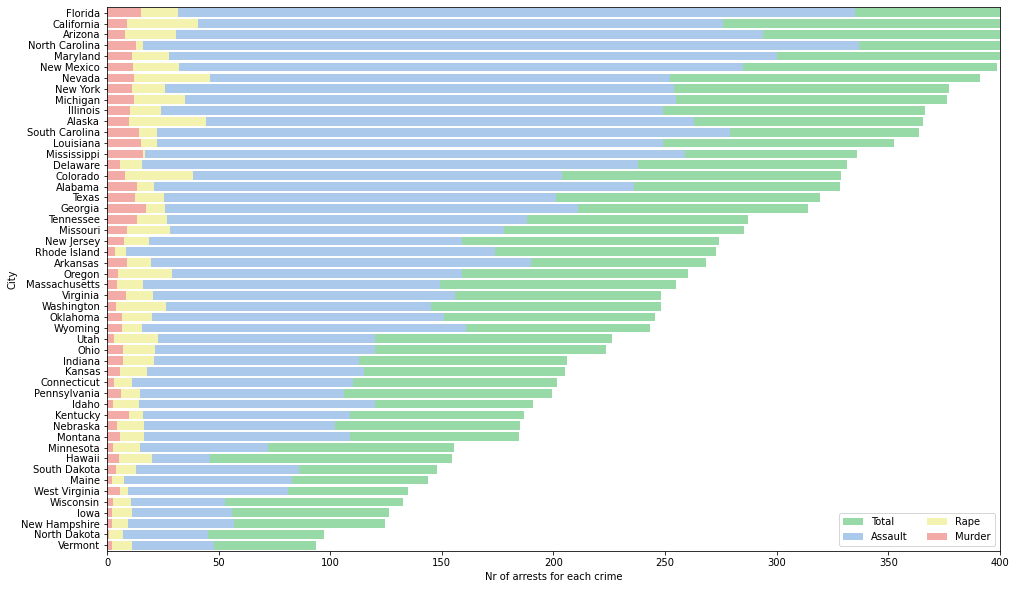

In [38]:
f, ax = plt.subplots(figsize=(16, 10))

stats = crimedata.sort_values("Total", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="Total", y="City", data=stats,
            label="Total", color="g")

sns.barplot(x="Assault", y="City", data=stats,
            label="Assault", color="b")

sns.barplot(x="Rape", y="City", data=stats,
            label="Rape", color="y")

sns.barplot(x="Murder", y="City", data=stats,
            label="Murder", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="City",
       xlabel="Nr of arrests for each crime");

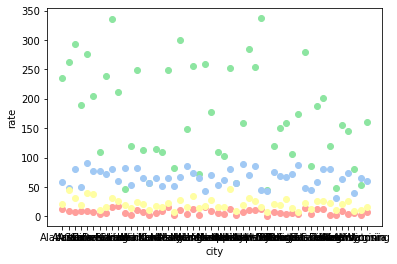

In [39]:
plt.scatter(crimedata.City, crimedata.Murder, color='r')
plt.scatter(crimedata.City,crimedata.Assault, color='g')
plt.scatter(crimedata.City,crimedata.Urbanpop, color='b')
plt.scatter(crimedata.City,crimedata.Rape, color='y')
plt.xlabel('city')
plt.ylabel('rate')
plt.show()

# 3 - Finding out the optimal number of clusters

In [40]:
X = crimedata[['Murder', 'Assault', 'Rape', 'Urbanpop']]

In [41]:
crimedata_norm = preprocessing.scale(X)

In [42]:
crimedata_norm = pd.DataFrame(crimedata_norm) #standardize the data to normal distribution

In [43]:
crimedata_norm.head()

,0,1,2,3
0,1.255179,0.790787,-0.003451,-0.526195
1,0.513019,1.118060,2.509424,-1.224067
2,0.072361,1.493817,1.053466,1.009122
3,0.234708,0.233212,-0.186794,-1.084492
4,0.281093,1.275635,2.088814,1.776781


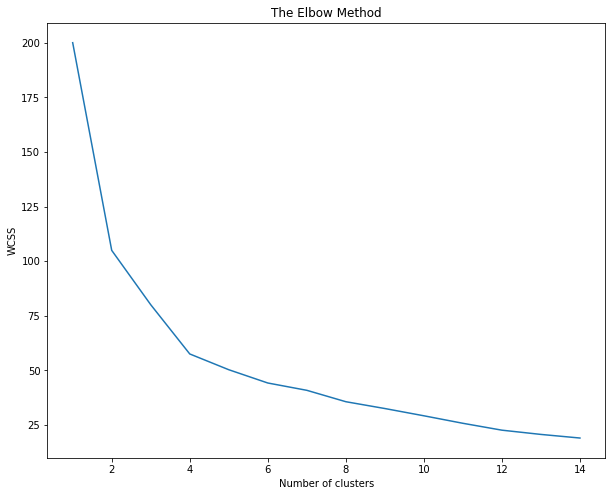

In [44]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(crimedata_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The scree plot levels off at k=4 and let's use it to determine the clusters

# 4 - Analysing the Data

In [74]:
##Initiation KMean class and fiting it on the data
k_clust = KMeans(n_clusters=4, random_state=0)
k_clust.fit(scaled_crime_data)

KMeans(n_clusters=4, random_state=0)

In [75]:
## Extracting clusters ids for each record
km_clust = pd.DataFrame(k_clust.labels_,columns=['k_clust_id'])
km_clust.head()

,k_clust_id
0,1
1,0
2,0
3,1
4,0


In [76]:
mcrime_data = pd.concat([km_clust,mcrime_data],axis=1)
# mcrime_data['k_clust_id'] = k_clust.labels_        ## adding cluster ids in the data frame and applying sort function.
mcrime_data.sort_values(by='k_clust_id')

,k_clust_id,d_clust_id,h_clust_id,City,Murder,Assault,Urbanpop,Rape,Total
24,0,-1,1,Missouri,9.0,178,70,28.2,285.2
27,0,-1,1,Nevada,12.2,252,81,46.0,391.2
12,0,-1,1,Illinois,10.4,249,83,24.0,366.4
30,0,-1,1,New Mexico,11.4,285,70,32.1,398.5
31,0,-1,1,New York,11.1,254,86,26.1,377.2
21,0,-1,1,Michigan,12.1,255,74,35.1,376.2
8,0,-1,1,Florida,15.4,335,80,31.9,462.3
5,0,-1,1,Colorado,7.9,204,78,38.7,328.6
4,0,-1,1,California,9.0,276,91,40.6,416.6
42,0,-1,1,Texas,12.7,201,80,25.5,319.2


In [77]:
## applying the groupby function based on kClustId - Mean
mcrime_data.groupby('k_clust_id').mean().sort_values(by='Murder')

,d_clust_id,h_clust_id,Murder,Assault,Urbanpop,Rape,Total
k_clust_id,,,,,,,
2,-0.076923,1.846154,3.600000,78.538462,52.076923,12.176923,146.392308
3,0.466667,0.000000,5.640000,132.266667,74.000000,18.980000,230.886667
0,-1.000000,1.000000,10.815385,257.384615,76.000000,33.192308,377.392308
1,-1.000000,2.333333,13.044444,243.000000,55.777778,20.788889,332.611111


In [78]:
## applying the groupby function based on kClustId - Median
mcrime_data.groupby('k_clust_id').median().sort_values(by='Murder')

,d_clust_id,h_clust_id,Murder,Assault,Urbanpop,Rape,Total
k_clust_id,,,,,,,
2,0.0,2.0,2.6,81.0,53.0,11.3,143.9
3,1.0,0.0,6.0,145.0,73.0,20.0,243.4
0,-1.0,1.0,11.1,255.0,80.0,31.9,377.2
1,-1.0,3.0,13.2,238.0,58.0,21.2,331.7


# 5 - Inference
1 - Analysing Murder and Assault variables shows a clearer connection between them. Higher the murder rates in a city higer the assaults and vice versa

2 = Contrary to murders and assaults, there is much more spread among the clusters when comparing murders and rapes. Some correlation is visible, but low murder rates in a city seem to indicate lower number of rapes and vice versa

3 - As with murder and assault, also rates of rape and assault show clearer correlations

### **DBSCAN CLUSTERING**

In [56]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [57]:
crimedata.columns

Index(['City', 'Murder', 'Assault', 'Urbanpop', 'Rape', 'Total', 'cluster'], dtype='object')

In [58]:
# Drop state for creating an array
crimedata.drop('City',axis=1,inplace=True)

In [59]:
# creating an array out of dataframe for only numeric values.
array = crimedata.values
array

array([[ 13.2, 236. ,  58. ,  21.2, 328.4,   2. ],
       [ 10. , 263. ,  48. ,  44.5, 365.5,   3. ],
       [  8.1, 294. ,  80. ,  31. , 413.1,   3. ],
       [  8.8, 190. ,  50. ,  19.5, 268.3,   2. ],
       [  9. , 276. ,  91. ,  40.6, 416.6,   3. ],
       [  7.9, 204. ,  78. ,  38.7, 328.6,   3. ],
       [  3.3, 110. ,  77. ,  11.1, 201.4,   1. ],
       [  5.9, 238. ,  72. ,  15.8, 331.7,   1. ],
       [ 15.4, 335. ,  80. ,  31.9, 462.3,   3. ],
       [ 17.4, 211. ,  60. ,  25.8, 314.2,   2. ],
       [  5.3,  46. ,  83. ,  20.2, 154.5,   1. ],
       [  2.6, 120. ,  54. ,  14.2, 190.8,   4. ],
       [ 10.4, 249. ,  83. ,  24. , 366.4,   3. ],
       [  7.2, 113. ,  65. ,  21. , 206.2,   1. ],
       [  2.2,  56. ,  57. ,  11.3, 126.5,   4. ],
       [  6. , 115. ,  66. ,  18. , 205. ,   1. ],
       [  9.7, 109. ,  52. ,  16.3, 187. ,   4. ],
       [ 15.4, 249. ,  66. ,  22.2, 352.6,   2. ],
       [  2.1,  83. ,  51. ,   7.8, 143.9,   4. ],
       [ 11.3, 300. ,  67. ,  2

In [60]:
scaler = StandardScaler().fit(array)            ## creation scaler class instance
x = scaler.transform(array)                     ## fitting it on the array
x                                               ## diplaying the standardized array

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  0.64788892,
        -0.38760987],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  1.02893964,
         0.45502028],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  1.51783489,
         0.45502028],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  0.03060731,
        -0.38760987],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  1.55378307,
         0.45502028],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  0.6499431 ,
         0.45502028],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.65651649,
        -1.23024001],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422,  0.68178292,
        -1.23024001],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  2.0231636 ,
         0.45502028],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  0.50204202,
        -0.38760987],
       [-0.57702994, -1.51224105,  1.21848371, -0.

In [61]:
## Both Fit_transform and Fit and Transform give you the same result.
scaler1 = StandardScaler()
y = scaler1.fit_transform(array)
y

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  0.64788892,
        -0.38760987],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  1.02893964,
         0.45502028],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  1.51783489,
         0.45502028],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  0.03060731,
        -0.38760987],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  1.55378307,
         0.45502028],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  0.6499431 ,
         0.45502028],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.65651649,
        -1.23024001],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422,  0.68178292,
        -1.23024001],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  2.0231636 ,
         0.45502028],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  0.50204202,
        -0.38760987],
       [-0.57702994, -1.51224105,  1.21848371, -0.

In [62]:
db = DBSCAN(eps=1.2,min_samples=6)      ## creating DBSCAN class --- testing it with various epsolon and minpoints for 
db.fit(x)                               ## for optimum clustring calculations... after various combinations eps 1.2 and 
print(db.labels_)                       ## min_samples of 5 looks optimum, with the highes score of .386

print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(x, db.labels_))


[-1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  0 -1  1  0  1 -1 -1  0 -1 -1 -1  0 -1
 -1  0  0 -1  0 -1 -1 -1 -1  0  1  1  1  1 -1 -1  0 -1 -1  1  0  1  1  0
  0  1]
Silhouette Coefficient: 0.317


In [63]:
## checking the parameters of db instance
db.get_params()

{'algorithm': 'auto',
 'eps': 1.2,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 6,
 'n_jobs': None,
 'p': None}

In [64]:
# creating a dataframe out of lables
d_clust = pd.DataFrame(db.labels_,columns=['d_clust_id'])
d_clust.head()

,d_clust_id
0,-1
1,-1
2,-1
3,-1
4,-1


In [65]:
## adding the db clusters to our master crime dataframe
mcrime_data = pd.concat([d_clust,mcrime_data],axis=1)
mcrime_data

,d_clust_id,h_clust_id,City,Murder,Assault,Urbanpop,Rape,Total
0,-1,3,Alabama,13.2,236,58,21.2,328.4
1,-1,1,Alaska,10.0,263,48,44.5,365.5
2,-1,1,Arizona,8.1,294,80,31.0,413.1
3,-1,0,Arkansas,8.8,190,50,19.5,268.3
4,-1,1,California,9.0,276,91,40.6,416.6
5,-1,1,Colorado,7.9,204,78,38.7,328.6
6,1,0,Connecticut,3.3,110,77,11.1,201.4
7,-1,0,Delaware,5.9,238,72,15.8,331.7
8,-1,1,Florida,15.4,335,80,31.9,462.3
9,-1,3,Georgia,17.4,211,60,25.8,314.2


In [66]:
# sorting by DB clust id
mcrime_data.sort_values(by='d_clust_id')

,d_clust_id,h_clust_id,City,Murder,Assault,Urbanpop,Rape,Total
0,-1,3,Alabama,13.2,236,58,21.2,328.4
42,-1,1,Texas,12.7,201,80,25.5,319.2
41,-1,3,Tennessee,13.2,188,59,26.9,287.1
39,-1,3,South Carolina,14.4,279,48,22.5,363.9
38,-1,0,Rhode Island,3.4,174,87,8.3,272.7
32,-1,3,North Carolina,13.0,337,45,16.1,411.1
31,-1,1,New York,11.1,254,86,26.1,377.2
30,-1,1,New Mexico,11.4,285,70,32.1,398.5
29,-1,0,New Jersey,7.4,159,89,18.8,274.2
27,-1,1,Nevada,12.2,252,81,46.0,391.2


In [67]:
## grouping by db clust id
mcrime_data.groupby('d_clust_id').median().sort_values(by='Murder')

,h_clust_id,Murder,Assault,Urbanpop,Rape,Total
d_clust_id,,,,,,
0,2.0,2.6,76.5,53.5,11.25,139.45
1,0.0,6.3,120.0,68.0,20.70,226.10
-1,1.0,11.1,249.0,72.0,25.50,336.20


In [79]:
## grouping by k Clust id
mcrime_data.groupby('k_clust_id').median().sort_values(by='Murder')

,d_clust_id,h_clust_id,Murder,Assault,Urbanpop,Rape,Total
k_clust_id,,,,,,,
2,0.0,2.0,2.6,81.0,53.0,11.3,143.9
3,1.0,0.0,6.0,145.0,73.0,20.0,243.4
0,-1.0,1.0,11.1,255.0,80.0,31.9,377.2
1,-1.0,3.0,13.2,238.0,58.0,21.2,331.7


In [80]:
## grouping by h Clust id
mcrime_data.groupby('h_clust_id').median().sort_values(by='Murder')

,k_clust_id,d_clust_id,Murder,Assault,Urbanpop,Rape,Total
h_clust_id,,,,,,,
2,2.0,0.0,2.60,76.5,53.5,11.25,139.45
0,3.0,1.0,6.15,147.0,72.0,19.15,244.50
1,0.0,-1.0,11.10,255.0,80.0,31.90,377.20
3,1.0,-1.0,14.40,249.0,58.0,22.20,336.20


# **Inference**

Dbscan dose not work properly on smaller datasets.It has only divided the database in two groups one outlier and other valid group.

While kmeans and Hirarchical clusters have given same results. with mean and median being very smilar to distinct groups.

There seems to be positive correlation in all types of crimes. one being higher means other is also higher.

UrbanPopulation seems to have an impact on the crime rate barring one cluster where crime rate is high dispite the UrbanPopulation being low.

As such both kmeans and Hirarchical clustering methods have predicted one cluster with low crime rate.